# Loan Prediction Problem Dataset


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


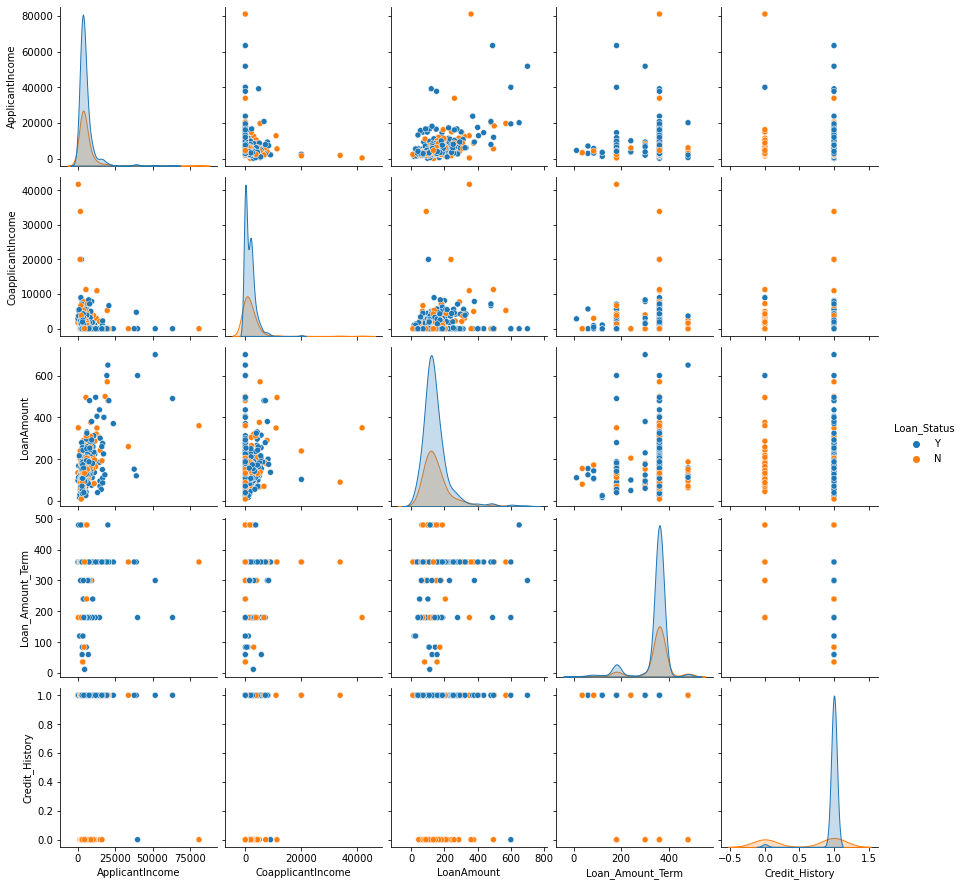

In [11]:
sns.pairplot(df,hue='Loan_Status')

Exploratory Data Analysis¶


In [13]:
Categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'object']
Categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'object']
Numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
Continous_features=[]
Discrete_features=[]
for feature in Numerical_features:
    print(f'Number of unique values in column {feature} is {df[feature].nunique()}')
    if df[feature].nunique()>15:
        Continous_features.append(feature)
    else:
        Discrete_features.append(feature)

Number of unique values in column ApplicantIncome is 505
Number of unique values in column CoapplicantIncome is 287
Number of unique values in column LoanAmount is 203
Number of unique values in column Loan_Amount_Term is 10
Number of unique values in column Credit_History is 2


In [16]:
#Taking columns having unique values less than 15 as discrete columns
Continous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [17]:
Discrete_features

['Loan_Amount_Term', 'Credit_History']

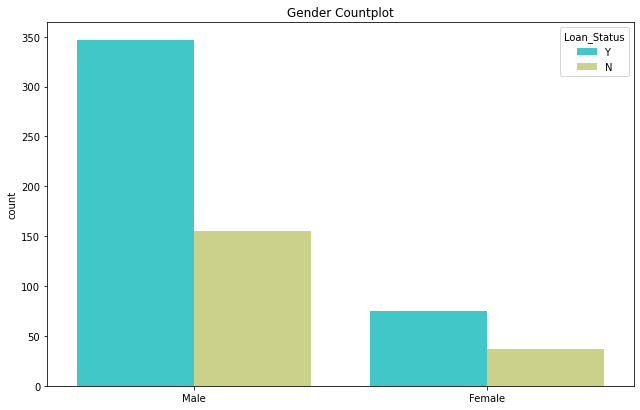

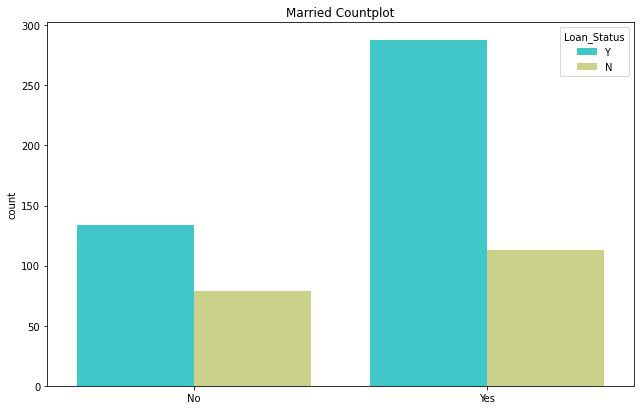

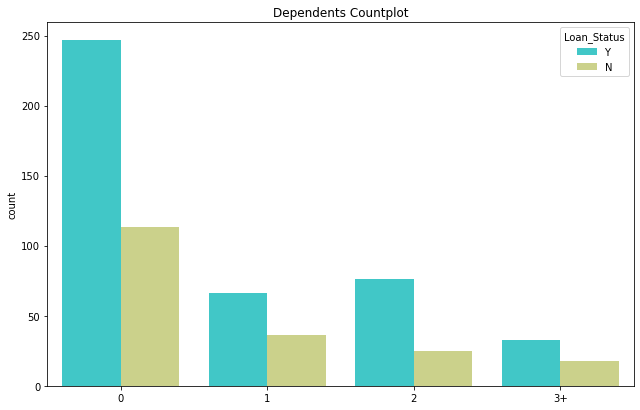

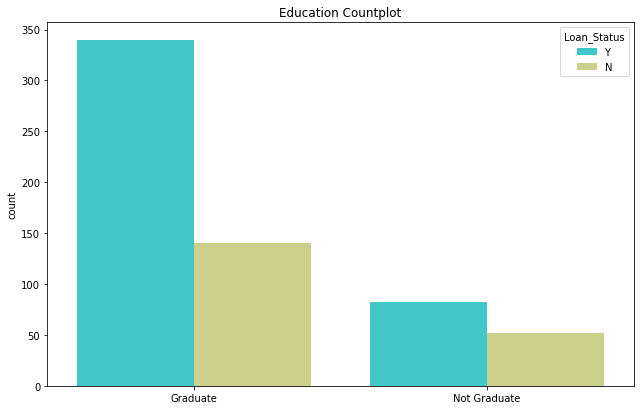

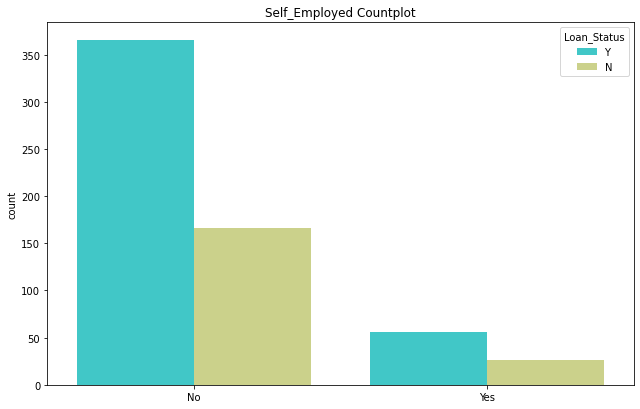

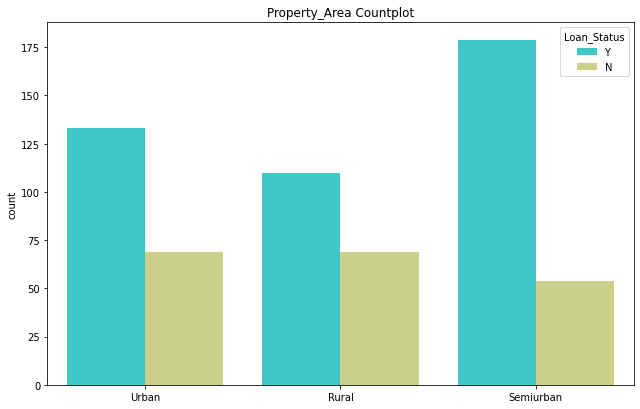

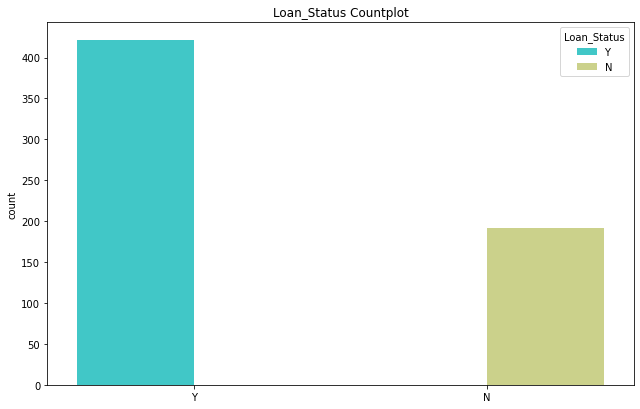

In [52]:
for feature in Categorical_features[1:]:
    plt.figure(figsize=(9,6))
    sns.countplot(data=df,x=feature,palette="rainbow",hue='Loan_Status')
    plt.title(f"{feature} Countplot")
    plt.tight_layout()
    plt.xlabel("")
    plt.show()

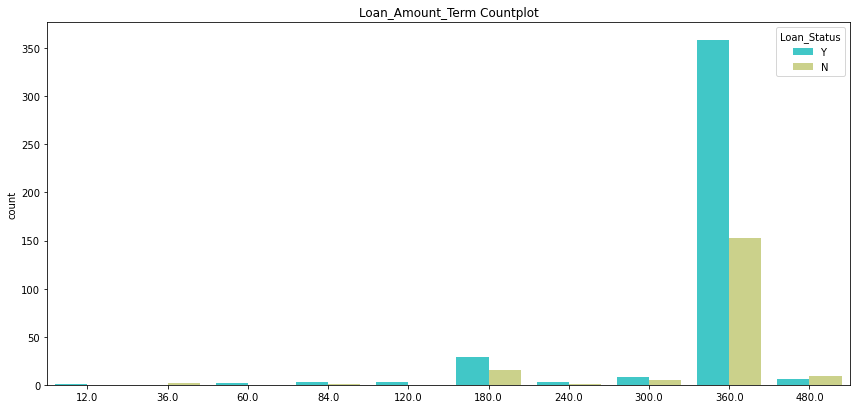

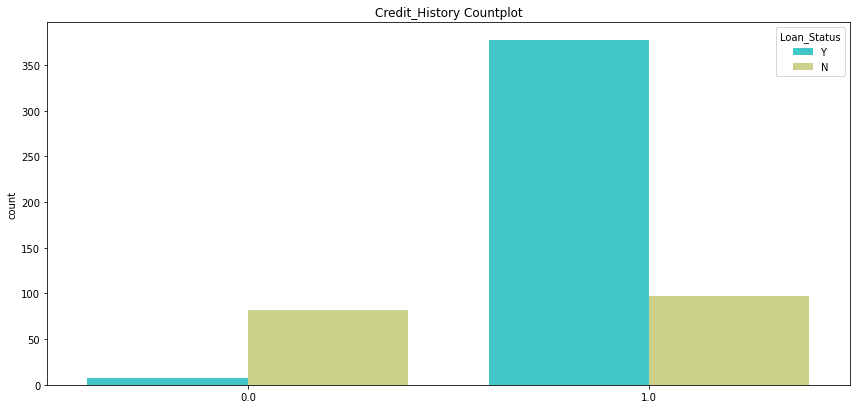

In [19]:
for feature in Discrete_features:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df,x=feature,palette="rainbow",hue='Loan_Status')
    plt.title(f"{feature} Countplot")
    plt.tight_layout()
    plt.xlabel("")
    plt.show()

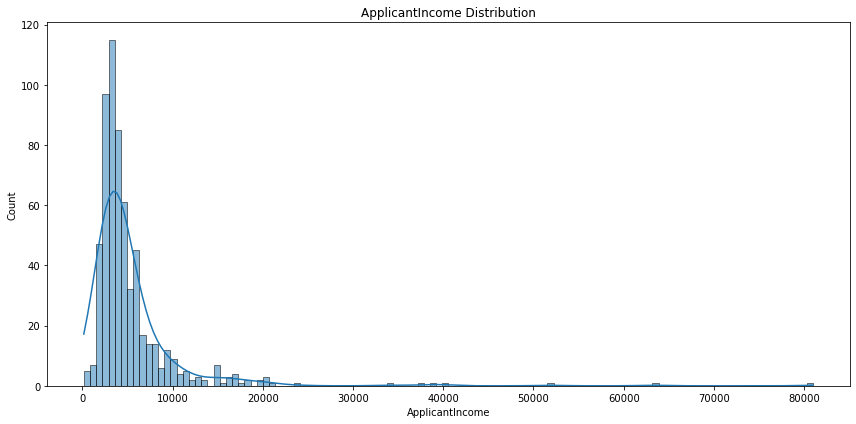

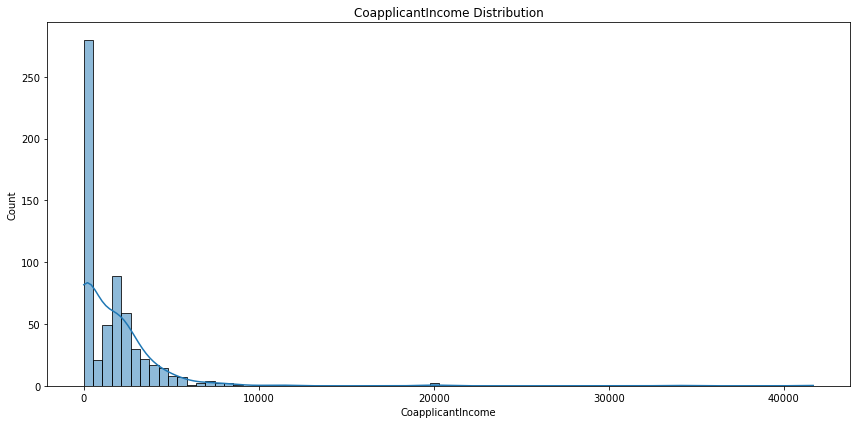

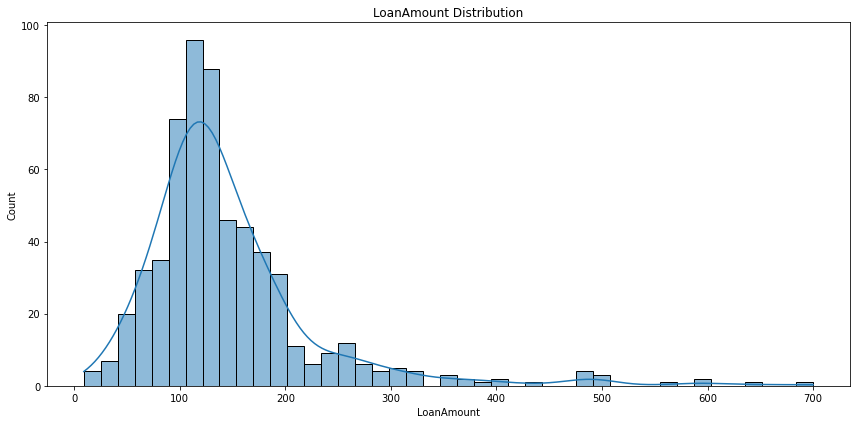

In [20]:
for feature in Continous_features:
    plt.figure(figsize=(12,6))
    sns.histplot(df[feature],palette="rainbow",kde=True)
    plt.title(f"{feature} Distribution")
    plt.tight_layout()
    plt.show()

In [21]:
#missing values
for feature in df.columns:
    print(f'No. of missing values in column {feature} is {sum(df[feature].isnull())}')
    print(f'NUll value percentage : {round(np.mean(df[feature].isnull())*100,2)} % \n')

No. of missing values in column Loan_ID is 0
NUll value percentage : 0.0 % 

No. of missing values in column Gender is 13
NUll value percentage : 2.12 % 

No. of missing values in column Married is 3
NUll value percentage : 0.49 % 

No. of missing values in column Dependents is 15
NUll value percentage : 2.44 % 

No. of missing values in column Education is 0
NUll value percentage : 0.0 % 

No. of missing values in column Self_Employed is 32
NUll value percentage : 5.21 % 

No. of missing values in column ApplicantIncome is 0
NUll value percentage : 0.0 % 

No. of missing values in column CoapplicantIncome is 0
NUll value percentage : 0.0 % 

No. of missing values in column LoanAmount is 22
NUll value percentage : 3.58 % 

No. of missing values in column Loan_Amount_Term is 14
NUll value percentage : 2.28 % 

No. of missing values in column Credit_History is 50
NUll value percentage : 8.14 % 

No. of missing values in column Property_Area is 0
NUll value percentage : 0.0 % 

No. of mis

<AxesSubplot:>

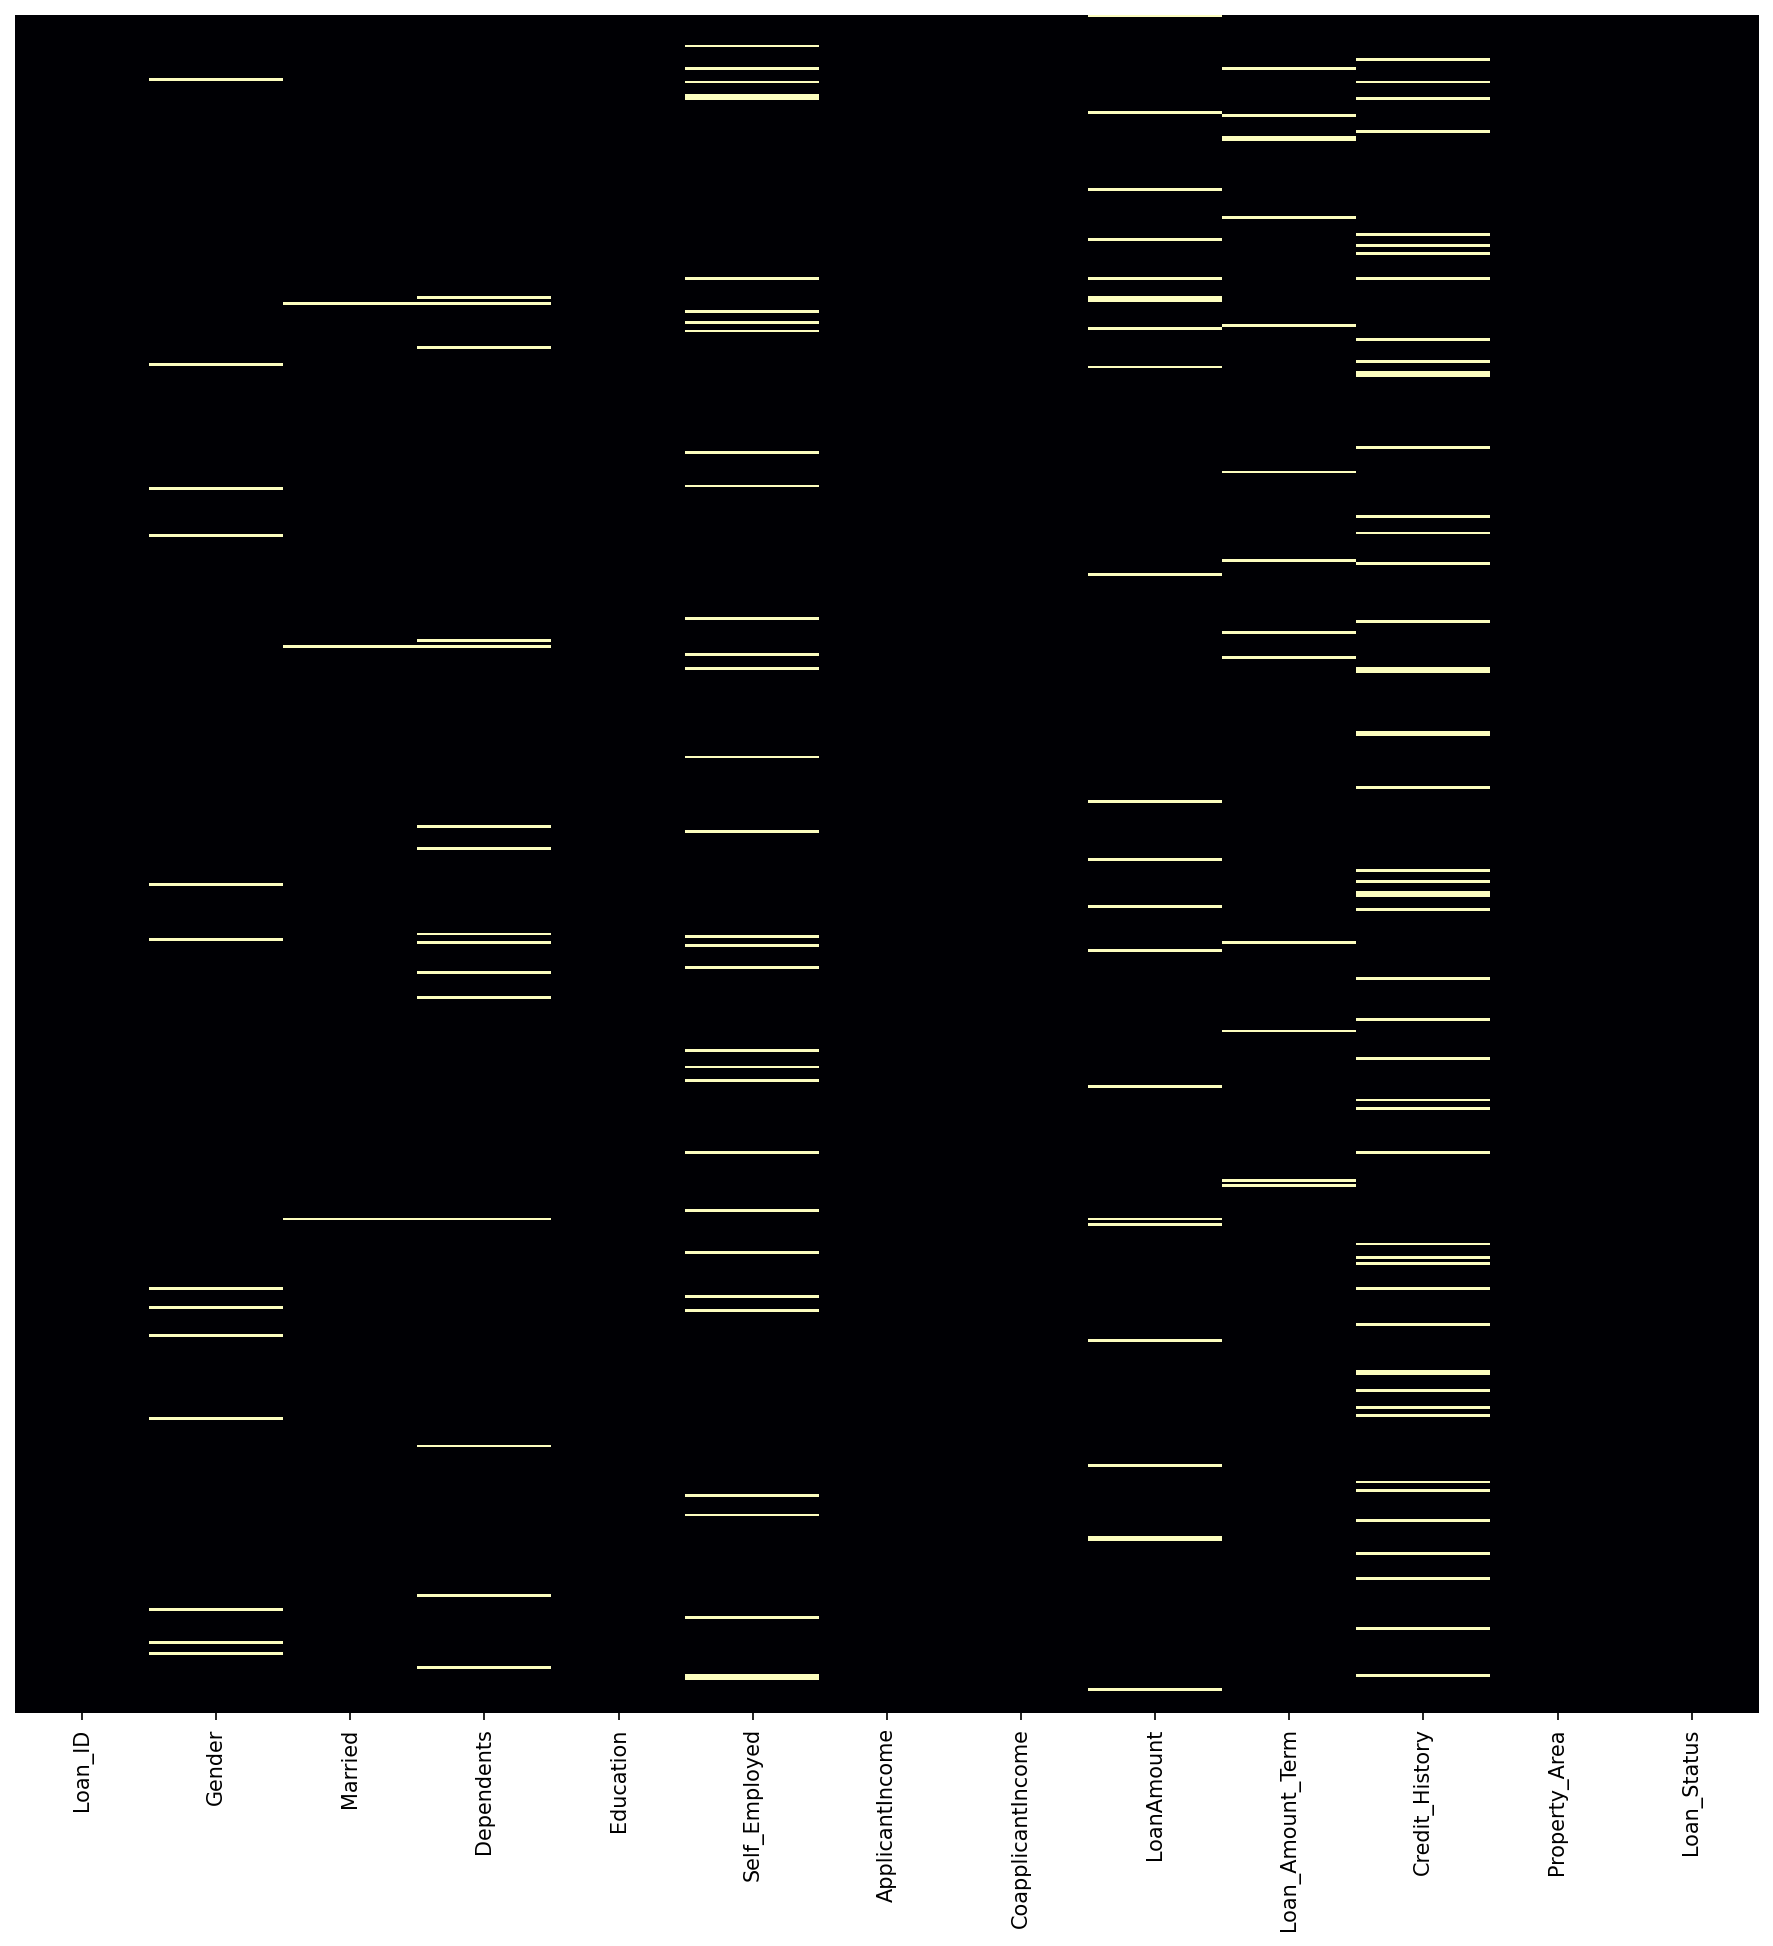

In [22]:
#it can be seen that all the columns except Credit_history have less than 5 percent of null value
#can be easily be substituted by suitable central tendacy 
#in case of categorical and discrete mode will be suitable
#while for continous values we can make use of boxplot to make the decision
plt.figure(figsize=(15,15),dpi=150)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [23]:
for feature in Categorical_features+Discrete_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

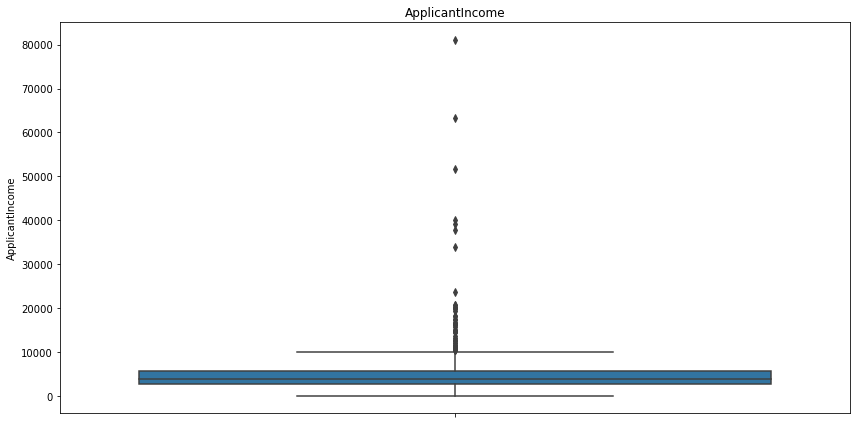

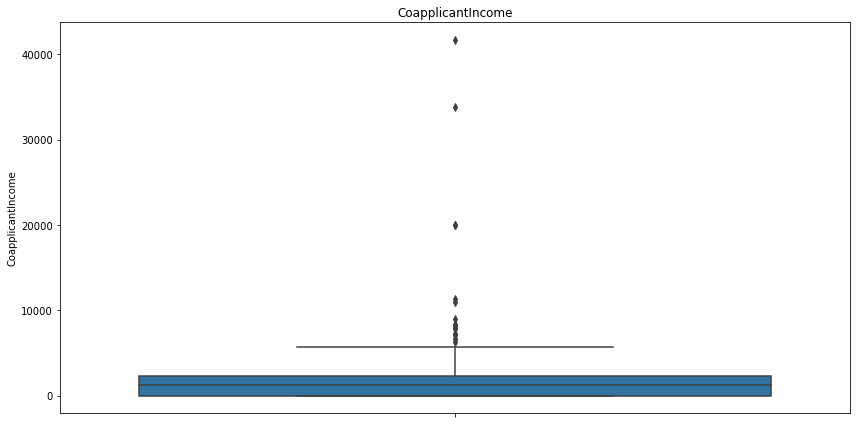

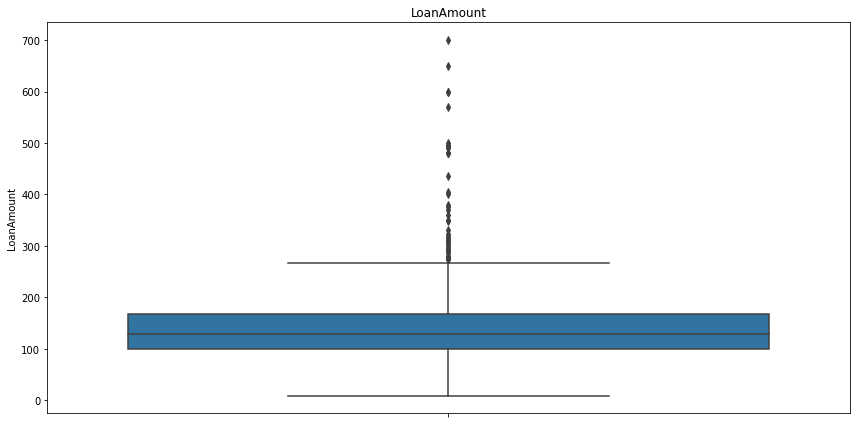

In [24]:
for feature in Continous_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(data = df, y=feature)
    plt.title(f"{feature}")
    plt.tight_layout()
    plt.show()

In [25]:
#since there are large numbers of outliers we are gonna fill the null values with median

In [26]:
for feature in Continous_features:
    df[feature].fillna(np.nanmedian(df[feature]),inplace=True)

<AxesSubplot:>

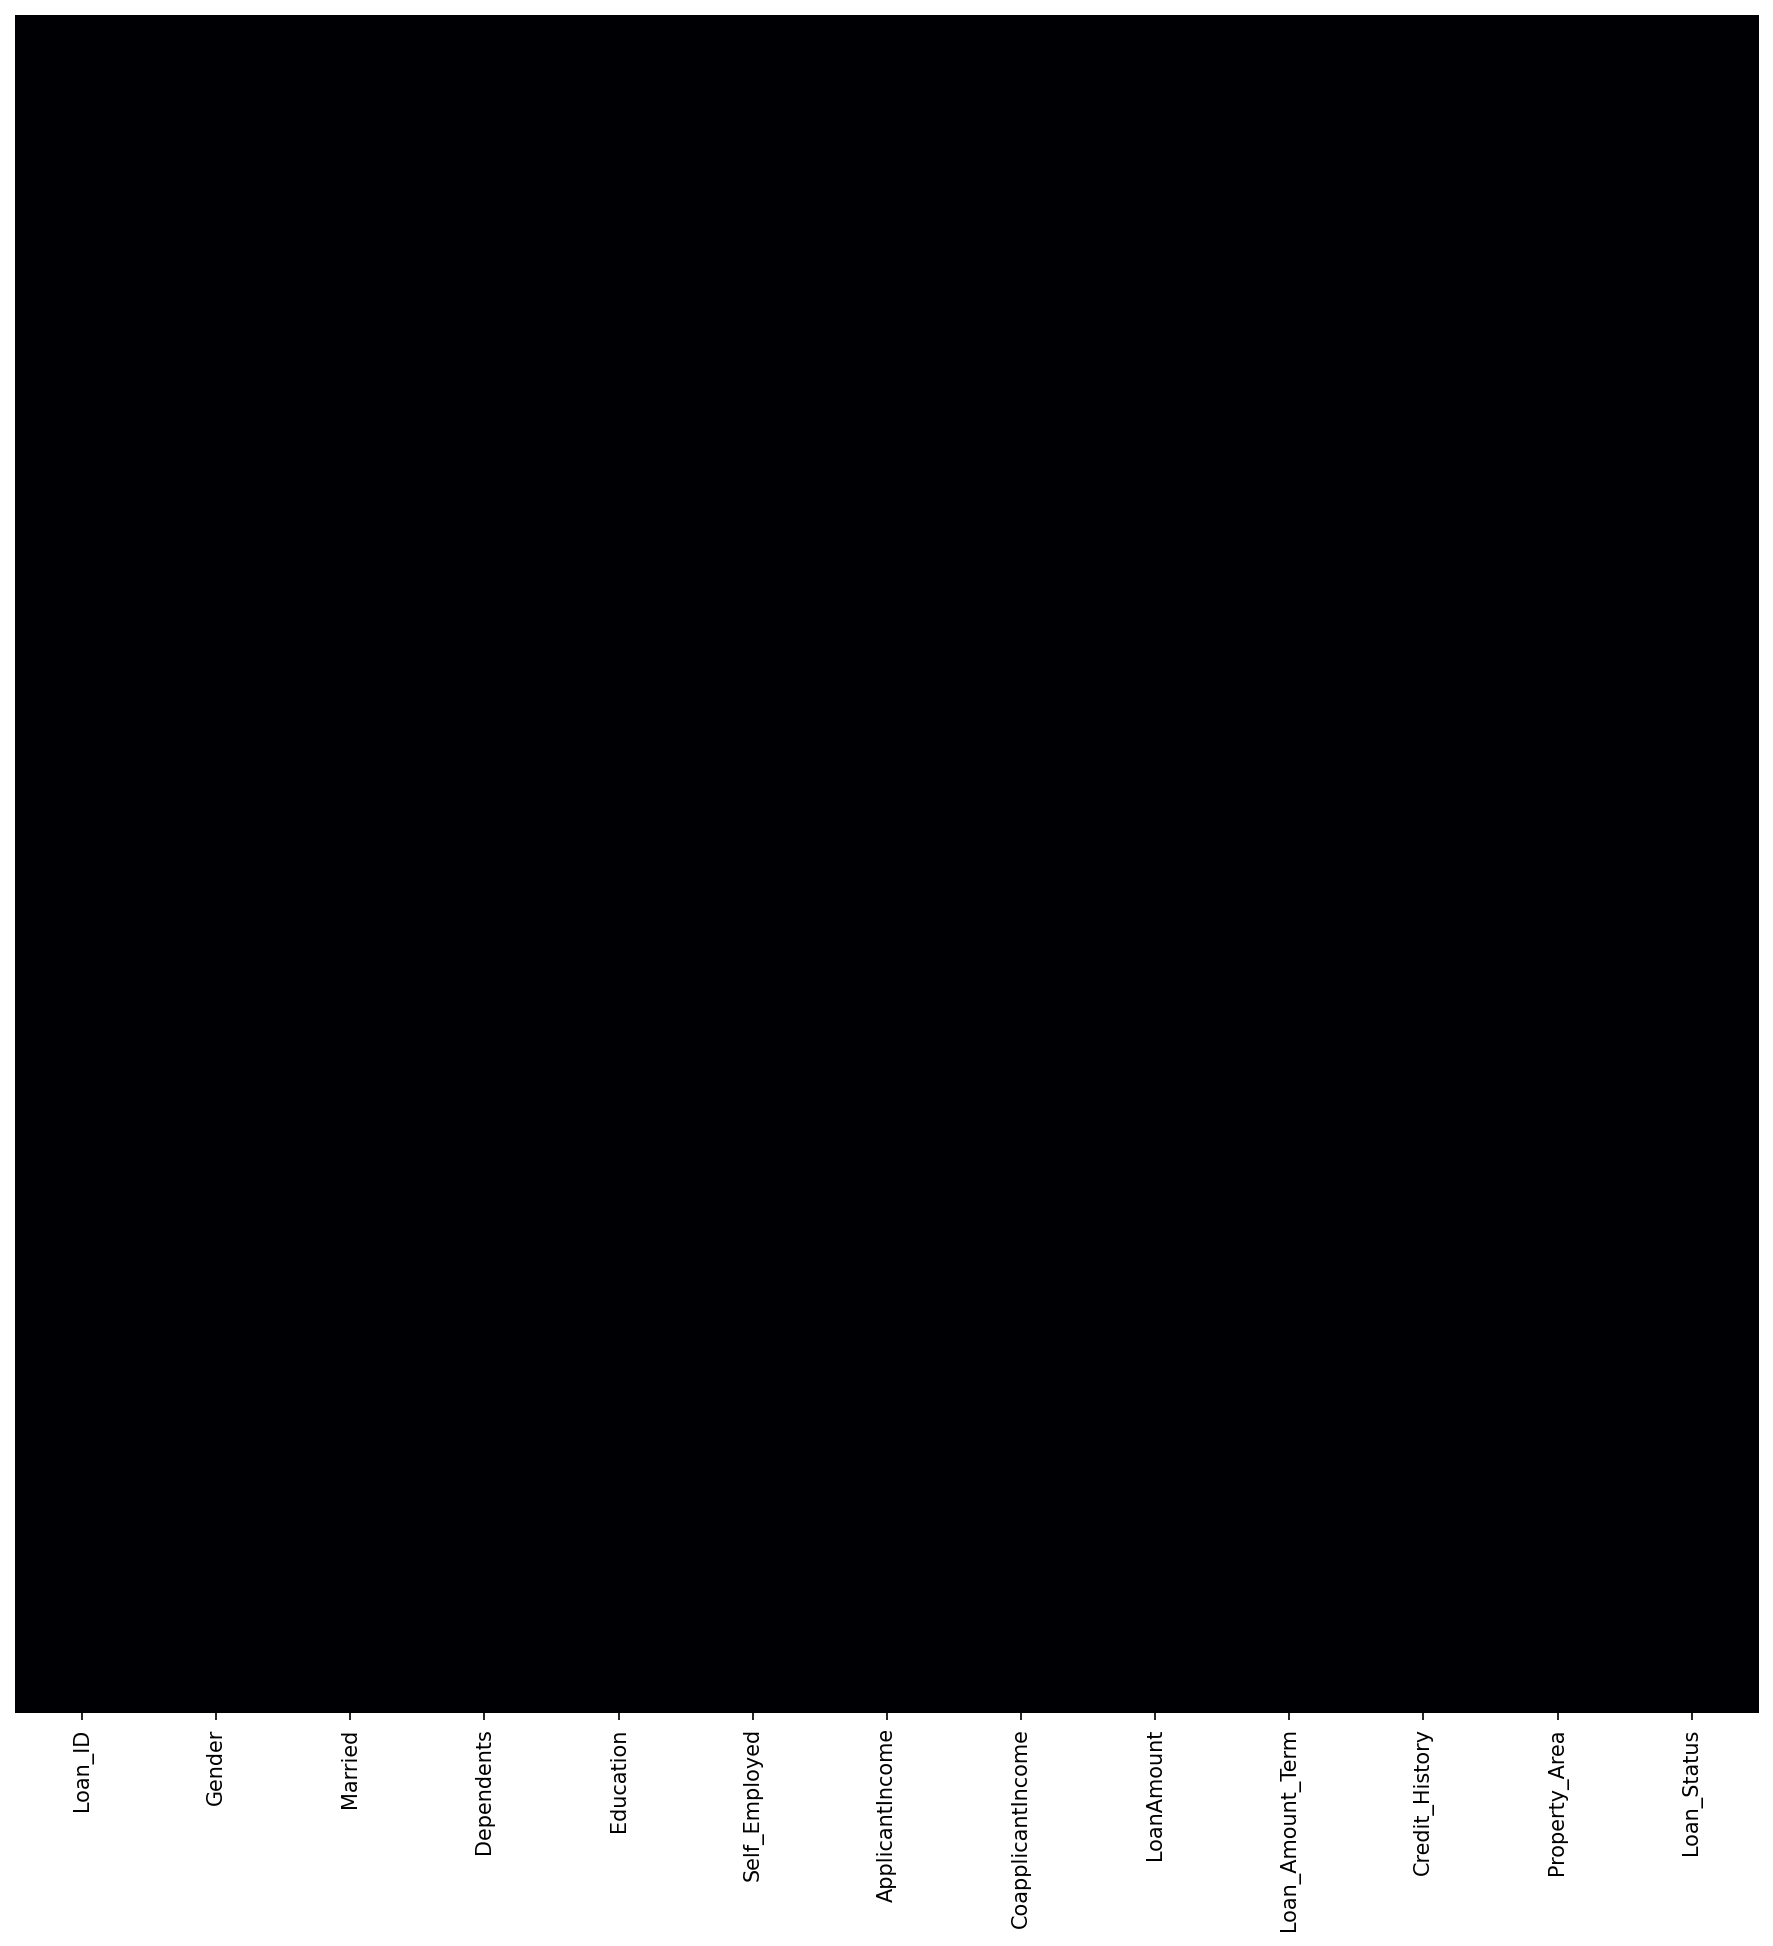

In [27]:
plt.figure(figsize=(15,15),dpi=150)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [28]:
#understanding the coleration
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

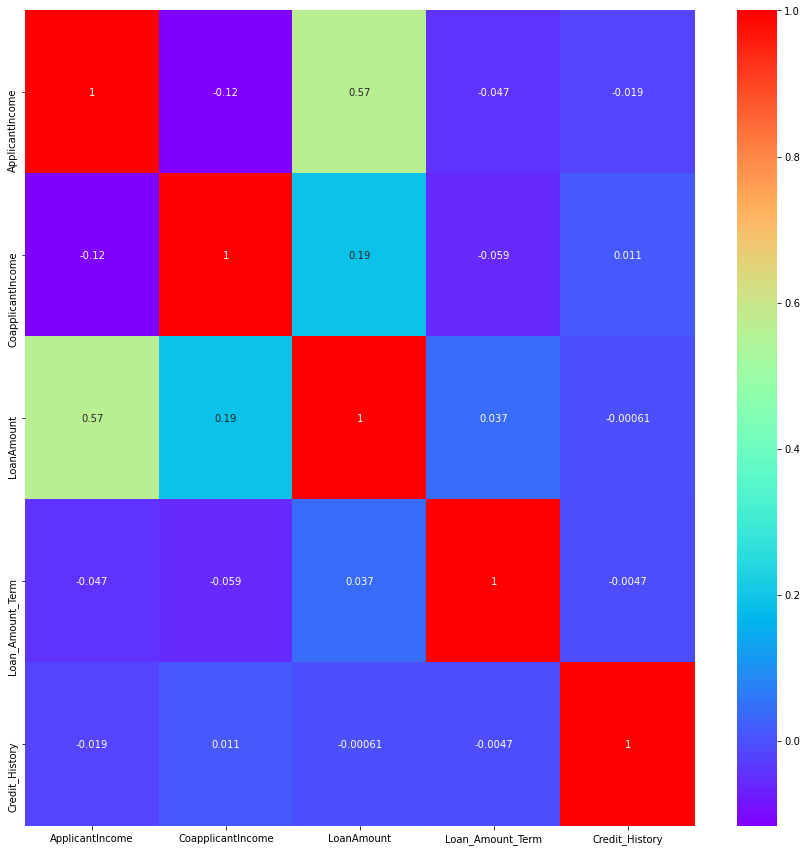

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
#Feature Engineering

In [32]:
#creating a copy and working o new dataframe
data=df.copy()
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [34]:
data.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome','Dependents'],inplace=True,axis=1)

In [35]:
Encoded_data=pd.DataFrame()

In [36]:
for feature in data.columns:
    if(data[feature].nunique()>3):
        pass
    else:
        for i in range(data[feature].nunique()-1):
            Encoded_data[feature]=np.where(str(data[feature].unique()[i]) == data[feature],1,0)

In [37]:
Encoded_data["LoanAmount"]=data["LoanAmount"]
Encoded_data["Loan_Amount_Term"]=data["Loan_Amount_Term"]
Encoded_data["Total_Income"]=data["Total_Income"]

In [38]:
Encoded_data["Credit_History"]=data["Credit_History"]

In [39]:
Encoded_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Total_Income
0,1,1,1,1,1.0,0,1,128.0,360.0,5849.0
1,1,0,1,1,1.0,1,0,128.0,360.0,6091.0
2,1,0,1,0,1.0,0,1,66.0,360.0,3000.0
3,1,0,0,1,1.0,0,1,120.0,360.0,4941.0
4,1,1,1,1,1.0,0,1,141.0,360.0,6000.0


In [40]:
#normalizing without inbuilt MinMaxScaler normalizer KINDA OFs
Standard_data=Encoded_data.copy()
Standard_data['LoanAmount']=(Standard_data['LoanAmount']-Standard_data['LoanAmount'].min())/(Standard_data['LoanAmount'].max()-Standard_data['LoanAmount'].min())
Standard_data['Loan_Amount_Term']=(Standard_data['Loan_Amount_Term']-Standard_data['Loan_Amount_Term'].min())/(Standard_data['Loan_Amount_Term'].max()-Standard_data['Loan_Amount_Term'].min())
Standard_data['Total_Income']=(Standard_data['Total_Income']-Standard_data['Total_Income'].min())/(Standard_data['Total_Income'].max()-Standard_data['Total_Income'].min())
Standard_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Total_Income
0,1,1,1,1,1.0,0,1,0.172214,0.74359,0.055394
1,1,0,1,1,1.0,1,0,0.172214,0.74359,0.058435
2,1,0,1,0,1.0,0,1,0.082489,0.74359,0.019583
3,1,0,0,1,1.0,0,1,0.160637,0.74359,0.043980
4,1,1,1,1,1.0,0,1,0.191027,0.74359,0.057292


In [41]:
#we have scaled our data 
#since output is not given for test dataset 
#to check the performance we are gonna split our train dataset and work 
x = Standard_data.drop(columns="Loan_Status", axis=1)
y = Standard_data['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [47]:
#using logistic regression model
loreg = LogisticRegression()

loreg.fit(x_train, y_train)
y_pred=loreg.predict(x_cv)

In [48]:
print("Train Accuracy: ", loreg.score(x_cv, y_cv) * 100,' %')

Train Accuracy:  79.67479674796748  %


In [49]:
print(classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.34      0.49        35
           1       0.79      0.98      0.87        88

    accuracy                           0.80       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.81      0.80      0.76       123



In [50]:
print(confusion_matrix(y_cv,y_pred))

[[12 23]
 [ 2 86]]


In [51]:
score = cross_val_score(loreg, x, y, cv=5)
print("Cross validation is",np.mean(score)*100)


Cross validation is 80.9462881514061


In [1]:
from tensorflow.keras.models import Sequential